In [1]:
# KMeans

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


In [30]:
# 데이터 생성
# make_blobs : 군집화에 필요한 데이터 생성
n_samples = 300
n_clusters = 3


In [31]:
x, y = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=42)

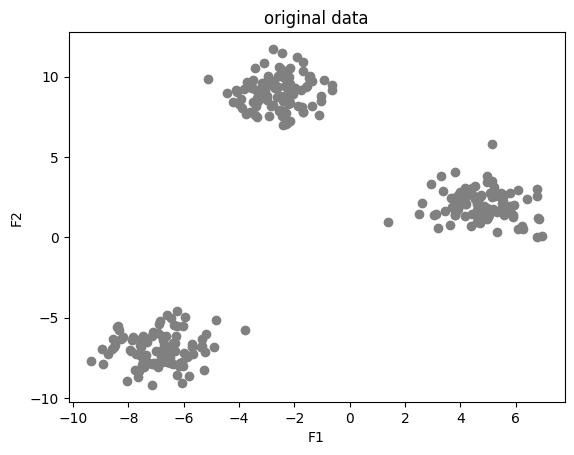

In [32]:
# 데이터 그래프 생성 : 군집화 하기 전, 중앙값 구하기 전
plt.scatter(x[:, 0], x[:, 1], c='gray', label='original data')
plt.title('original data')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

In [36]:
# KMeans 객체 생성
kmeans = KMeans(n_clusters=3, random_state=42)


In [37]:
# 레이블 값 반환
cluster_labels = kmeans.fit_predict(x)

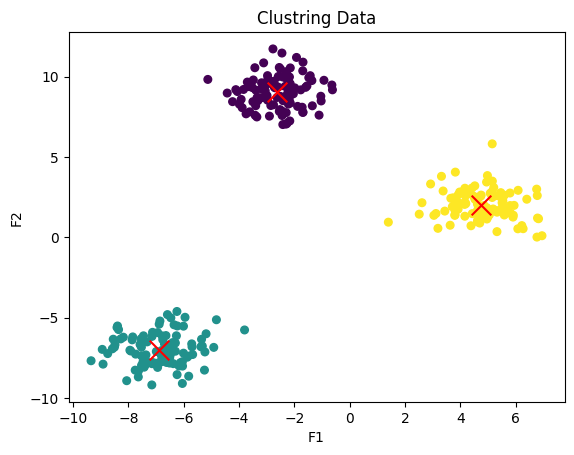

In [38]:
# 군집 결과 시각화
plt.scatter(x[:, 0], x[:, 1], cmap='viridis', c=cluster_labels, s=30, label='Cluster Data')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='x')
plt.title('Clustring Data')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()

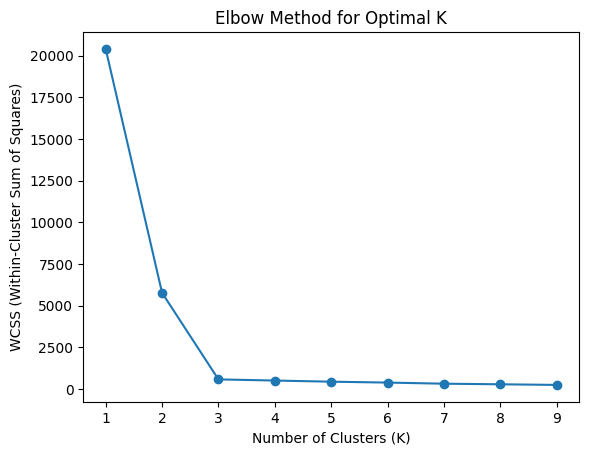

In [39]:
# 최적의 k 값 찾기기
wcss = []
k_range = range(1,10)
for k in k_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    kmeans_temp.fit(x)
    wcss.append(kmeans_temp.inertia_)

plt.plot(k_range, wcss, marker = 'o')
plt.title("Elbow Method for Optimal K")
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

In [40]:
from sklearn.metrics import silhouette_score, silhouette_samples


In [41]:
# 실루엣 스코어
sil_avg = silhouette_score(x, cluster_labels)
print(sil_avg)

0.8480303059596955


In [42]:
sil_values = silhouette_samples(x, cluster_labels)

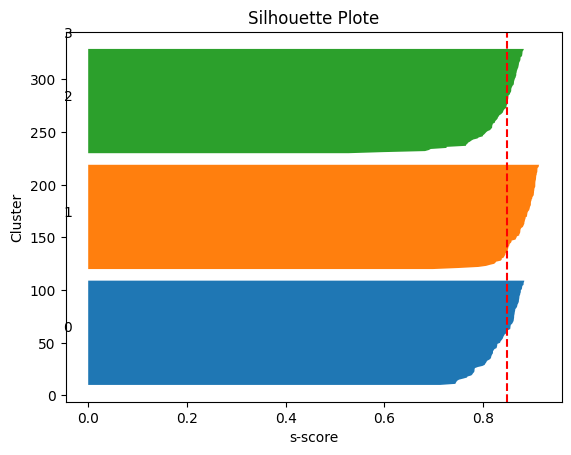

In [43]:
y_lower = 10
for i in range(4):
    ith_cluster_sil_values = sil_values[cluster_labels == i]
    ith_cluster_sil_values.sort()
    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # 막대그래프 추가
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values)
    plt.text(-0.05, y_lower + 0.5*size_cluster_i, str(i))
    y_lower = y_upper + 10

plt.axvline(x=sil_avg, color='red', linestyle='--')
plt.title('Silhouette Plote')
plt.xlabel('s-score')
plt.ylabel('Cluster')
plt.show()